In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
#playlists_tracks = pd.read_csv("./playlists_tracks")
#genres_artists = pd.read_csv("./genres_artists")
playlists_tracks = pd.read_csv("/content/drive/Othercomputers/Meu laptop (1)/Data Analyst/Data Analyst/Aula 1  - playlist spotify/playlists_tracks")
genres_artists = pd.read_csv("/content/drive/Othercomputers/Meu laptop (1)/Data Analyst/Data Analyst/Aula 1  - playlist spotify/genres_artists")

In [52]:
playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866


In [53]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [54]:
### Limpeza e transformações

'''Antes de analisarmos as playlists e os gêneros, vamos preparar nossos dados:
1. Extrair apenas o **ano** da data de lançamento dos álbuns
2. Remover músicas com **nome ausente**
3. Transformar a tabela de gêneros para que cada **gênero tenha uma linha própria**'''

playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [55]:
playlists_tracks['playlist_name'].value_counts()

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241
...,...
indie mtv 6h em 2008,18
Nunca canso de ouvir,16
Instrumental,16


In [56]:
playlists_tracks['playlist_name'].value_counts().head(5)

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241


In [57]:
# Extrair o ano
playlists_tracks['album_release_date_ajustado'] = pd.to_datetime(playlists_tracks['album_release_date'], errors="coerce")


In [58]:
playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_date_ajustado'],
      dtype='object')

In [59]:
playlists_tracks['album_release_date_ajustado'].dtype

dtype('<M8[ns]')

In [60]:
playlists_tracks['album_release_year'] = pd.to_datetime(playlists_tracks['album_release_date_ajustado']).dt.year
playlists_tracks.head(3)

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT,NaN
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,NaT,NaN


In [61]:
# Excluir linhas com track_name ausente
playlists_tracks_clean = playlists_tracks.dropna(subset = ["track_name"])
playlists_tracks_clean.shape

(8659, 12)

In [62]:
# Organizar 1 linha por gênero
genres_artists.head(5)


,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [63]:
# para separar gêneros usar como lista, pq atualmente estao como str
genres_artists['lista_genero'] = genres_artists['genres'].fillna('').str.split(',')
genres_artists.head(5)

,Unnamed: 0,artist_name,genres,lista_genero
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal","[rap metal, rap rock, alternative metal, nu..."
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...","[nu metal, metal, alternative metal, rap me..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock","[metal, thrash metal, rock, heavy metal, h..."
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk","[punk, hardcore punk, skate punk, proto-punk]"
4,4,The Hives,garage rock,[garage rock]


In [64]:
genero_explodido = genres_artists.explode('lista_genero')
genero_explodido.head(5)

,Unnamed: 0,artist_name,genres,lista_genero
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",rap metal
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",rap rock
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",alternative metal
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",nu metal
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",nu metal


In [65]:
genero_explodido.drop(columns=['genres', 'Unnamed: 0'], inplace=True)
genero_explodido.shape
# equivalente a:
#genero_explodido = genero_explodido.drop(columns=['genres', 'Unnamed: 0'])

(1789, 2)

In [66]:
genero_explodido_limpo = genero_explodido[genero_explodido['lista_genero'] != ''] # mantém só o que possui gênero
genero_explodido_limpo.shape

(1515, 2)

In [67]:
# Quais playlists têm mais músicas?

playlists_counts = playlists_tracks_clean['playlist_name'].value_counts().head(10)
playlists_counts

,count
playlist_name,
Caminhando sem padrão nenhum,311
Rockzim pra cantar junto,300
cantando feat. rebolando,274
tudo misturado curtindo uma chuva,261
Radio em '00,241
VOLTA JUVENTUDE,239
Black power,231
jovem indie,219
Top indie,215


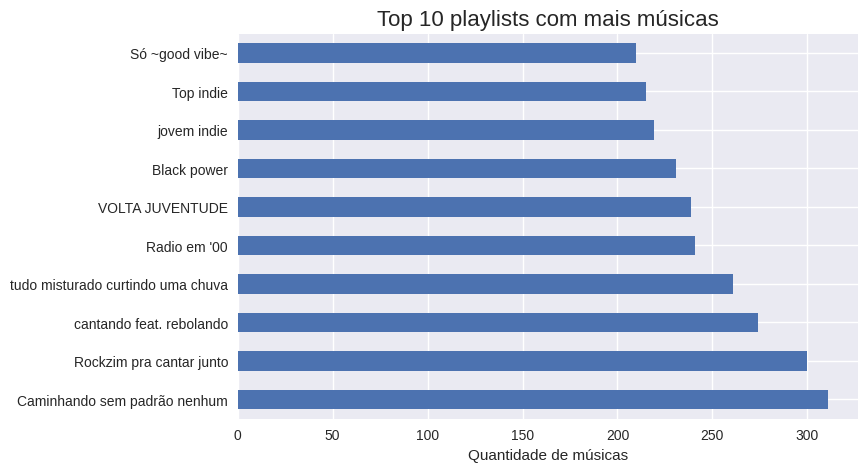

In [68]:
playlists_counts.plot(kind = 'barh', figsize = (8, 5))
plt.title("Top 10 playlists com mais músicas", fontsize = 16)
plt.xlabel("Quantidade de músicas")
plt.ylabel("")
plt.show()

In [69]:
# Agora verificar a evolução da quantidade de músicas lançadas por ano nas playlits

plt.style.use('seaborn-v0_8')

In [70]:
songs_per_year = (playlists_tracks_clean['album_release_year'].value_counts().sort_index())
songs_per_year

,count
album_release_year,
1958.0,1
1960.0,4
1964.0,3
1966.0,1
1967.0,7
1968.0,14
1969.0,5
1970.0,25
1971.0,5


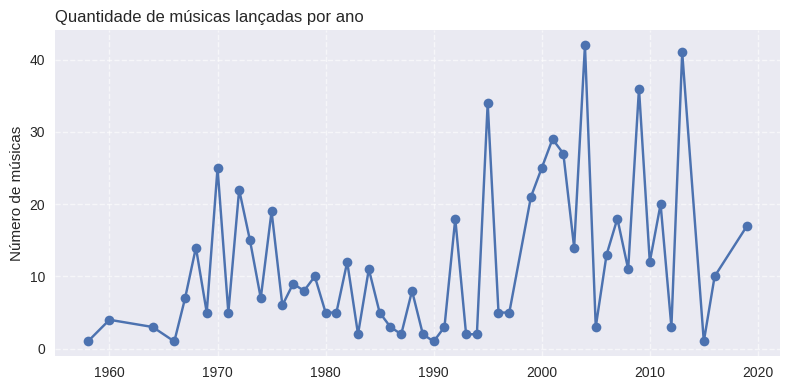

In [72]:
songs_per_year.plot(kind='line', marker="o", figsize=(8,4))

plt.title('Quantidade de músicas lançadas por ano', loc='left')
plt.xlabel("")
plt.ylabel("Número de músicas")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [74]:
# quais são os artistas com maior popularidade média?
playlists_tracks.head(1)

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0


In [75]:
popularidade = (playlists_tracks_clean.groupby('artist_names')['popularity'].mean().sort_values(ascending=False).reset_index())
popularidade

,artist_names,popularity
0,The Neighbourhood,91.0
1,"Gorillaz, De La Soul",90.0
2,Fleetwood Mac,89.0
3,"The Weeknd, Daft Punk",89.0
4,"Kendrick Lamar, SZA",89.0
...,...,...
1413,Nando Reis & Os Infernais,0.0
1414,Ogi,0.0
1415,Olly Alexander (Years & Years),0.0
1416,"Omulu, Luedji Luna, ÀTTØØXXÁ",0.0


In [76]:
popularidade.head(10)

,artist_names,popularity
0,The Neighbourhood,91.000000
1,"Gorillaz, De La Soul",90.000000
2,Fleetwood Mac,89.000000
3,"The Weeknd, Daft Punk",89.000000
4,"Kendrick Lamar, SZA",89.000000
5,"Tyler, The Creator, Kali Uchis",89.000000
6,Bad Bunny,88.333333
7,sombr,88.000000
8,"The Chainsmokers, Halsey",86.000000
9,a-ha,86.000000


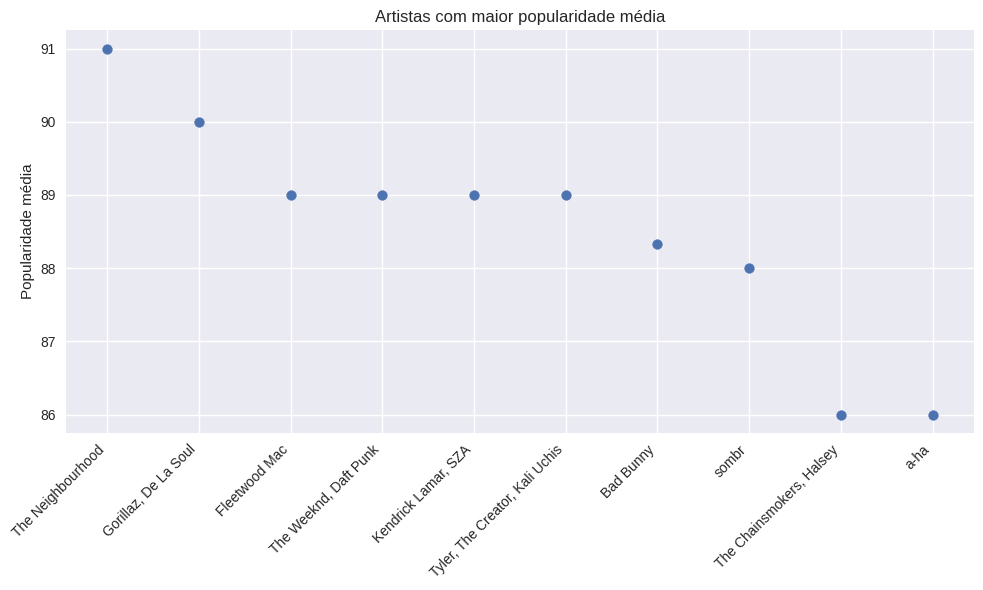

In [77]:
top10 = popularidade.nlargest(10, 'popularity')
plt.figure(figsize=(10, 6))
plt.scatter(top10['artist_names'], top10['popularity'])

plt.xticks(rotation=45, ha='right')
plt.ylabel("Popularidade média")
plt.title("Artistas com maior popularidade média")
plt.tight_layout()
plt.show()


In [79]:
#quais são os artistas mais frequentes nas playlits?
pop = (playlists_tracks_clean.groupby('artist_names')['popularity'].value_counts())
pop.head(10)

artist_names  popularity
*NSYNC        73            2
              79            2
              22            1
              58            1
              63            1
              66            1
107 Faunos    1             1
1915          39            1
3OH!3         71            2
3OH!3, Kesha  61            1
Name: count, dtype: int64

In [80]:
pop_df = pop.reset_index(name='freq')
pop10 = pop_df.nlargest(10, 'freq')

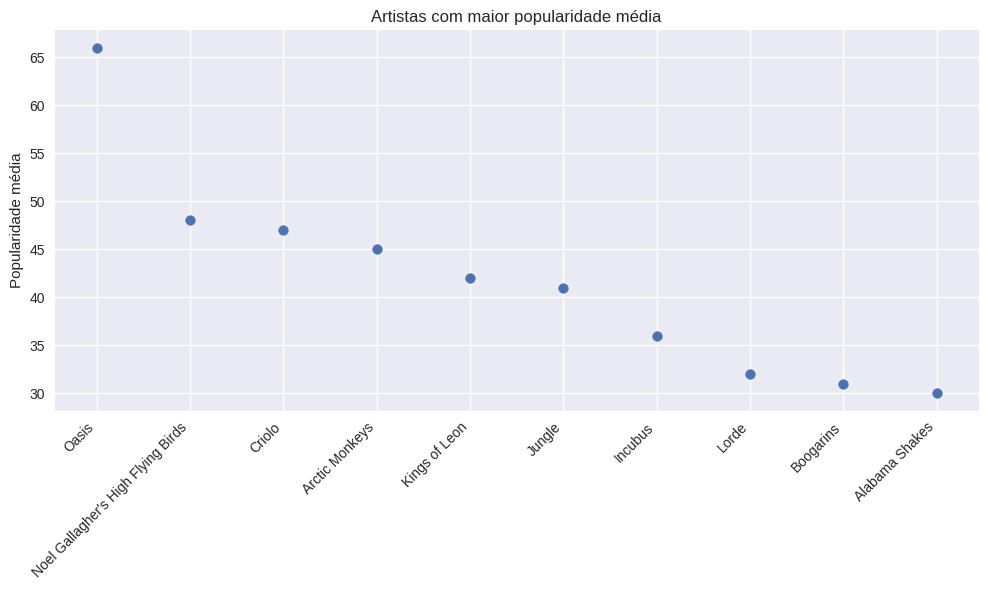

In [85]:
plt.figure(figsize=(10,6))
plt.scatter(pop10['artist_names'], pop10['freq'])

plt.xticks(rotation=45, ha='right')
plt.ylabel("Popularidade média")
plt.title("Artistas com maior popularidade média")
plt.tight_layout()
plt.show()

In [90]:
# quais gêneros são mais frequentes nas playlists?
# aqui será necessário fazer intesecção dos dois dataframes.
genero_explodido_limpo.columns

Index(['artist_name', 'lista_genero'], dtype='object')

In [89]:
playlists_tracks_clean.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_date_ajustado', 'album_release_year'],
      dtype='object')

In [92]:
play_genres = playlists_tracks_clean.merge(genero_explodido_limpo,
    left_on='artist_names',
    right_on='artist_name',
    how='left')

In [98]:
generos_freq = (play_genres['lista_genero'].value_counts().head(10))
generos_freq

,count
lista_genero,
alternative rock,519
mpb,514
mpb,513
rock,485
nova mpb,417
bossa nova,364
indie,363
madchester,357
britpop,327


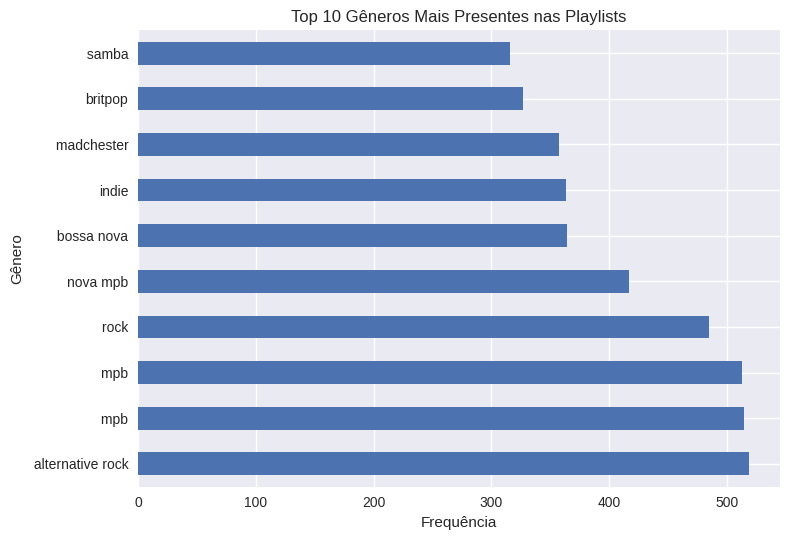

In [113]:
generos_freq.plot(kind='barh')
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.title('Top 10 Gêneros Mais Presentes nas Playlists')
plt.tight_layout()
plt.show()

In [114]:
# qual é a duração média das músicas por playlits?
playlists_tracks_clean.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_release_date_ajustado', 'album_release_year'],
      dtype='object')

In [115]:
duracao_media = playlists_tracks_clean.groupby('playlist_name')['duration_ms'].mean()
duracao_media

,duration_ms
playlist_name,
+55,226099.039735
Andando relaxando,233643.430769
Antigo br bem bom,213012.117647
Aquela jantinha,231714.047619
Bebendo na sala,240190.526316
...,...
serotonina pra trabalhar,245182.054545
só elas,213736.916667
tout le monde,220899.196078


In [116]:
# como a duração média está em ms, faz mais sentido olhar em minutos. Para isso, fazer conversão
duracao_media_min = duracao_media / 60000
duracao_media_min

,duration_ms
playlist_name,
+55,3.768317
Andando relaxando,3.894057
Antigo br bem bom,3.550202
Aquela jantinha,3.861901
Bebendo na sala,4.003175
...,...
serotonina pra trabalhar,4.086368
só elas,3.562282
tout le monde,3.681653


In [117]:
#aqui podemos bricnar um pouco com análise exploratória.
#vamos identificar quais são mais longas e quais mais curtas em duração
duracao_media_min.describe()

,duration_ms
count,89.000000
mean,3.821714
std,0.286721
min,3.272168
25%,3.604808
50%,3.768317
75%,4.003175
max,5.057276


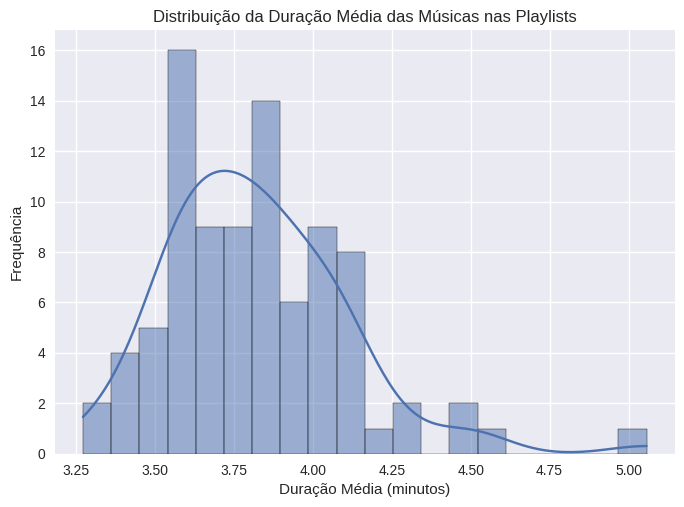

In [135]:
sns.histplot(duracao_media_min, bins=20, kde=True)
plt.title('Distribuição da Duração Média das Músicas nas Playlists')
plt.xlabel('Duração Média (minutos)')
plt.ylabel('Frequência')
plt.show()

In [146]:
#existe relação entre o ano de lançamento e a duração média das músicas?
duracao_por_ano = (playlists_tracks_clean.groupby('album_release_year')['duration_ms']
    .mean()
    .reset_index())
duracao_por_ano["duracao_min"] = duracao_por_ano["duration_ms"] / 60000
duracao_por_ano.drop(columns=['duration_ms'], inplace=True)
duracao_por_ano.head(5)

,album_release_year,duracao_min
0,1958.0,2.626000
1,1960.0,3.176383
2,1964.0,2.844589
3,1966.0,2.595100
4,1967.0,2.938533


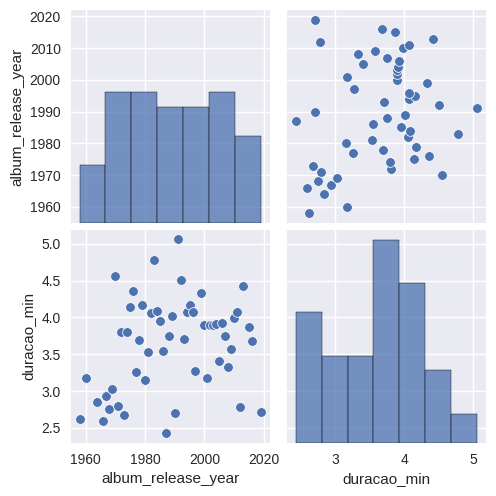

In [147]:
sns.pairplot(duracao_por_ano)
plt.show()

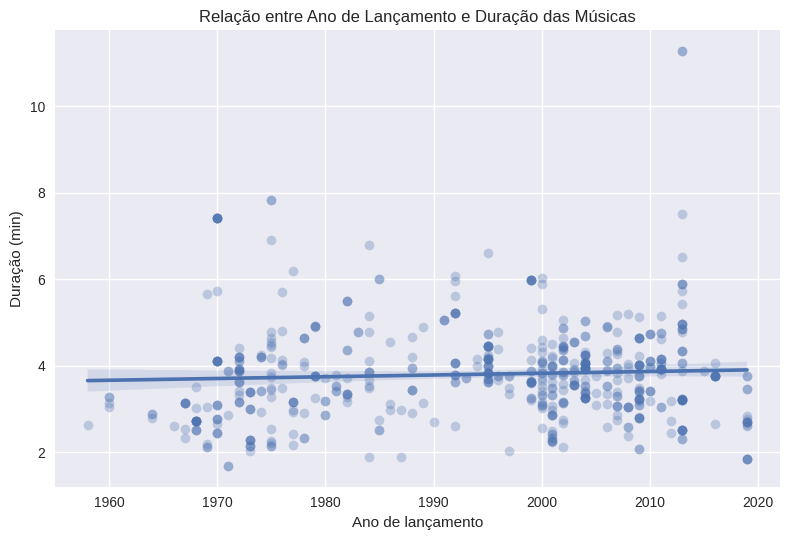

In [160]:
sns.regplot(
    data=playlists_tracks_clean,
    x='album_release_year',
    y=playlists_tracks_clean['duration_ms'] / 60000,
    scatter_kws={'alpha':0.3}
)
plt.ylabel('Duração (min)')
plt.xlabel('Ano de lançamento')
plt.title('Relação entre Ano de Lançamento e Duração das Músicas')
plt.tight_layout()
plt.show()

In [161]:
# quão diversa em gêneros é cada playlist?
df = playlists_tracks.merge( # poderia ser usado o join
    genero_explodido_limpo,
    left_on='artist_names', #usa essa coluna do df na playlist
    right_on='artist_name', #
    how = 'left')
df.head(5)

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_release_date_ajustado,album_release_year,artist_name,lista_genero
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0,Rage Against The Machine,rap metal
1,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0,Rage Against The Machine,rap rock
2,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0,Rage Against The Machine,alternative metal
3,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0,Rage Against The Machine,nu metal
4,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT,NaN,System Of A Down,nu metal
